#Import all necessary libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import average_precision_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.utils import resample


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#EDA

Read the data into dataframe & EDA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Data03_ccFraud.csv')
df.head()

,custID,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk
0,1,1,35,1,3000,4,14,2,0
1,2,2,2,1,0,9,0,18,0
2,3,2,2,1,0,27,9,16,0
3,4,1,15,1,0,12,0,5,0
4,5,1,46,1,0,11,16,7,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 9 columns):
 #   Column        Dtype
---  ------        -----
 0   custID        int64
 1   gender        int64
 2   state         int64
 3   cardholder    int64
 4   balance       int64
 5   numTrans      int64
 6   numIntlTrans  int64
 7   creditLine    int64
 8   fraudRisk     int64
dtypes: int64(9)
memory usage: 686.6 MB


In [ ]:
df.describe()

,custID,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,5.000000e+06,1.382177e+00,2.466127e+01,1.030004e+00,4.109920e+03,2.893519e+01,4.047190e+00,9.134469e+00,5.960140e-02
std,2.886751e+06,4.859195e-01,1.497012e+01,1.705991e-01,3.996847e+03,2.655378e+01,8.602970e+00,9.641974e+00,2.367469e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.500001e+06,1.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,4.000000e+00,0.000000e+00
50%,5.000000e+06,1.000000e+00,2.400000e+01,1.000000e+00,3.706000e+03,1.900000e+01,0.000000e+00,6.000000e+00,0.000000e+00
75%,7.500000e+06,2.000000e+00,3.800000e+01,1.000000e+00,6.000000e+03,3.900000e+01,4.000000e+00,1.100000e+01,0.000000e+00
max,1.000000e+07,2.000000e+00,5.100000e+01,2.000000e+00,4.148500e+04,1.000000e+02,6.000000e+01,7.500000e+01,1.000000e+00


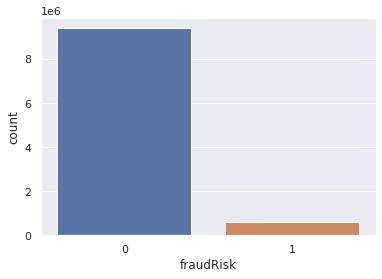

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(x="fraudRisk", data=df)

In [ ]:
df.fraudRisk.value_counts()

0    9403986
1     596014
Name: fraudRisk, dtype: int64

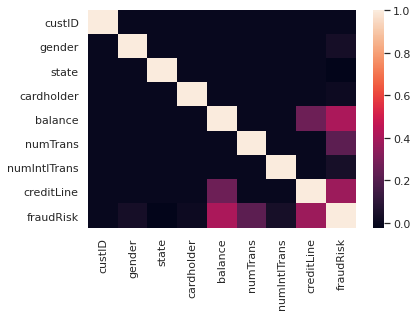

In [ ]:
sns.heatmap(df.corr())

# Data Preprocessing

In [ ]:
# As each ID is unique, it is not helpful in model training
# Thus this feature is dropped 
df = df.drop(["custID"], axis=1)

In [ ]:
df.head()

,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk
0,1,35,1,3000,4,14,2,0
1,2,2,1,0,9,0,18,0
2,2,2,1,0,27,9,16,0
3,1,15,1,0,12,0,5,0
4,1,46,1,0,11,16,7,0


In [ ]:
# Scale the independent variables
y = df["fraudRisk"].values  # target attributes
X = df.drop(["fraudRisk"], axis=1) # input attributes


x_scale = preprocessing.MinMaxScaler().fit_transform(X.values)



#Standard ML training and evaluation 

In [ ]:
# reduce the size of the data as it takes too long for training
reduce_x, large_x, reduce_y, large_y = train_test_split(x_scale, y,
                                                  test_size=0.98, stratify=y)

# data splitting
train_x, val_x, train_y, val_y = train_test_split(reduce_x, reduce_y,
                                                  test_size=0.4, stratify=reduce_y)


In [ ]:
train_x.shape

(120000, 7)

In [ ]:
val_x.shape

(80000, 7)

## Supervised ML techniques

### Decision Tree

In [ ]:
# Decision Tree
DT_clf = DecisionTreeClassifier().fit(train_x, train_y)
# tree.plot_tree(DT_clf)

In [ ]:
# DT Performance Evaluation
pred_y_DT = DT_clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_DT))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_DT, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_DT))
precision = precision_score(val_y, pred_y_DT)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_DT)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_DT))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_DT))





Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     75232
           1       0.46      0.49      0.48      4768

    accuracy                           0.94     80000
   macro avg       0.71      0.73      0.72     80000
weighted avg       0.94      0.94      0.94     80000


Confusion Matrix: 
 [[ 2343  2425]
 [ 2749 72483]]
Accuracy Score:  0.935325
Precision Score:  0.4601335428122545
Recall Score:  0.4914010067114094
F1 Score:  0.4752535496957404
ROC AUC:  0.7274303523561301


### Logistic Regression

In [ ]:
# Logistic regression
LR_clf = LogisticRegression().fit(train_x, train_y)


In [ ]:
# LR Performance Evaluation
pred_y_LR = LR_clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_LR))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_LR, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_LR))
precision = precision_score(val_y, pred_y_LR)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_LR)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_LR))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_LR))





Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     75232
           1       0.74      0.47      0.58      4768

    accuracy                           0.96     80000
   macro avg       0.86      0.73      0.78     80000
weighted avg       0.95      0.96      0.95     80000


Confusion Matrix: 
 [[ 2260  2508]
 [  777 74455]]
Accuracy Score:  0.9589375
Precision Score:  0.7441554165294699
Recall Score:  0.473993288590604
F1 Score:  0.5791159513132608
ROC AUC:  0.7318326183488961


### Support Vector Machine

In [ ]:
# Support Vector Machine
SVM_clf = svm.SVC().fit(train_x, train_y)


In [ ]:
# SVM Performance Evaluation
pred_y_SVM = SVM_clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_SVM))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_SVM, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_SVM))
precision = precision_score(val_y, pred_y_SVM)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_SVM)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_SVM))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_SVM))




Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     75232
           1       0.82      0.36      0.50      4768

    accuracy                           0.96     80000
   macro avg       0.89      0.68      0.74     80000
weighted avg       0.95      0.96      0.95     80000


Confusion Matrix: 
 [[ 1727  3041]
 [  378 74854]]
Accuracy Score:  0.9572625
Precision Score:  0.8204275534441805
Recall Score:  0.3622063758389262
F1 Score:  0.502546195256802
ROC AUC:  0.6785909590806711


### KNN

In [ ]:
# K Nearest Neighbors
KNN_clf = KNeighborsClassifier(n_neighbors=3).fit(train_x, train_y)

In [ ]:
# KNN Performance Evaluation
pred_y_KNN = KNN_clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_KNN))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_KNN, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_KNN))
precision = precision_score(val_y, pred_y_KNN)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_KNN)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_KNN))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_KNN))




Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     75232
           1       0.61      0.45      0.52      4768

    accuracy                           0.95     80000
   macro avg       0.79      0.72      0.75     80000
weighted avg       0.94      0.95      0.95     80000


Confusion Matrix: 
 [[ 2141  2627]
 [ 1347 73885]]
Accuracy Score:  0.950325
Precision Score:  0.6138188073394495
Recall Score:  0.44903523489932884
F1 Score:  0.5186531007751938
ROC AUC:  0.7155653099209532


### RF

In [ ]:
# Random Forrest
RF_clf = RandomForestClassifier().fit(train_x, train_y)

In [ ]:
# RF Performance Evaluation
pred_y_RF = RF_clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_RF))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_RF, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_RF))
precision = precision_score(val_y, pred_y_RF)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_RF)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_RF))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_RF))




Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     75232
           1       0.67      0.46      0.55      4768

    accuracy                           0.95     80000
   macro avg       0.82      0.72      0.76     80000
weighted avg       0.95      0.95      0.95     80000


Confusion Matrix: 
 [[ 2202  2566]
 [ 1065 74167]]
Accuracy Score:  0.9546125
Precision Score:  0.6740128558310376
Recall Score:  0.46182885906040266
F1 Score:  0.548102053515868
ROC AUC:  0.7238363244685254


## Unsupervised ML techniques

### K means

In [ ]:
## K means
Kmeans_clf = KMeans().fit(train_x)

In [ ]:
# Predict the top 3% farthest points from center as anomaly
clusters_y_Kmeans = Kmeans_clf.predict(val_x)

clusters_centers=Kmeans_clf.cluster_centers_
dist = [np.linalg.norm(x-y) for x,y in zip(val_x,clusters_centers[clusters_y_Kmeans])]

pred_y_Kmeans=np.array(dist)
pred_y_Kmeans[dist>=np.percentile(dist,97)]=1
pred_y_Kmeans[dist<np.percentile(dist,97)]=0

# Kmeans Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_Kmeans))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_Kmeans, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_Kmeans))
precision = precision_score(val_y, pred_y_Kmeans)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_Kmeans)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_Kmeans))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_Kmeans))




Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     75232
           1       0.30      0.15      0.20      4768

    accuracy                           0.93     80000
   macro avg       0.62      0.56      0.58     80000
weighted avg       0.91      0.93      0.92     80000


Confusion Matrix: 
 [[  718  4050]
 [ 1682 73550]]
Accuracy Score:  0.92835
Precision Score:  0.2991666666666667
Recall Score:  0.15058724832214765
F1 Score:  0.20033482142857142
ROC AUC:  0.5641148704392533


### One Class SVM

In [ ]:
## One-Class SVM
OCSVM_clf = OneClassSVM(gamma='auto', nu=0.1).fit(train_x[train_y==0])

In [ ]:
# convert from class -1 1 to 1 0
pred_y_OCSVM = OCSVM_clf.predict(val_x)
pred_y_OCSVM [pred_y_OCSVM ==1] = 0
pred_y_OCSVM [pred_y_OCSVM ==-1] = 1

# One-Class SVM Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_OCSVM))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_OCSVM, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_OCSVM))
precision = precision_score(val_y, pred_y_OCSVM)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_OCSVM)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_OCSVM))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_OCSVM))




Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     75232
           1       0.22      0.43      0.29      4768

    accuracy                           0.87     80000
   macro avg       0.59      0.67      0.61     80000
weighted avg       0.92      0.87      0.89     80000


Confusion Matrix: 
 [[ 2063  2705]
 [ 7442 67790]]
Accuracy Score:  0.8731625
Precision Score:  0.21704366123093108
Recall Score:  0.4326761744966443
F1 Score:  0.2890772787781125
ROC AUC:  0.6668777512210997


### Isolation Forest

In [ ]:
## Isolation Forest
IsoF_clf = IsolationForest().fit(train_x[train_y==0])

In [ ]:
# convert from class -1 1 to 1 0
pred_y_IsoF = IsoF_clf.predict(val_x)
pred_y_IsoF [pred_y_IsoF ==1] = 0
pred_y_IsoF [pred_y_IsoF ==-1] = 1

# Isolation Forest Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_IsoF))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_IsoF, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_IsoF))
precision = precision_score(val_y, pred_y_IsoF)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_IsoF)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_IsoF))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_IsoF))




Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.80      0.88     75232
           1       0.21      0.87      0.34      4768

    accuracy                           0.80     80000
   macro avg       0.60      0.84      0.61     80000
weighted avg       0.94      0.80      0.85     80000


Confusion Matrix: 
 [[ 4171   597]
 [15372 59860]]
Accuracy Score:  0.8003875
Precision Score:  0.2134268024356547
Recall Score:  0.8747902684563759
F1 Score:  0.3431368516309489
ROC AUC:  0.8352311614506465


## Hybrid Model

### RF --> IsoF (supervised then unsupervised)

In [ ]:
# those instance predicted as normal by rf will go through
# 2nd prediction by using IsoF

pred_y_RF_IsoF = IsoF_clf.predict(val_x[pred_y_RF==0])
pred_y_RF_IsoF [pred_y_RF_IsoF ==1] = 0
pred_y_RF_IsoF [pred_y_RF_IsoF ==-1] = 1


pred_y_RF[pred_y_RF==0] = pred_y_RF_IsoF



In [ ]:
# RF_IsoF Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_RF))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_RF, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_RF))
precision = precision_score(val_y, pred_y_RF)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_RF)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_RF))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_RF))



Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     75232
           1       0.21      0.88      0.34      4768

    accuracy                           0.80     80000
   macro avg       0.60      0.84      0.61     80000
weighted avg       0.94      0.80      0.85     80000


Confusion Matrix: 
 [[ 4180   588]
 [15434 59798]]
Accuracy Score:  0.799725
Precision Score:  0.21311308249209748
Recall Score:  0.8766778523489933
F1 Score:  0.3428758920515134
ROC AUC:  0.835762894698529


### LR --> IsoF (supervised then unsupervised)

In [ ]:
# those instance predicted as normal by LR will go through
# 2nd prediction by using IsoF

pred_y_LR_IsoF = IsoF_clf.predict(val_x[pred_y_LR==0])
pred_y_LR_IsoF [pred_y_LR_IsoF ==1] = 0
pred_y_LR_IsoF [pred_y_LR_IsoF ==-1] = 1


pred_y_LR[pred_y_LR==0] = pred_y_LR_IsoF

In [ ]:
# LR_IsoF Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_LR))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_LR, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_LR))
precision = precision_score(val_y, pred_y_LR)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_LR)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_LR))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_LR))


Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.80      0.88     75232
           1       0.21      0.87      0.34      4768

    accuracy                           0.80     80000
   macro avg       0.60      0.84      0.61     80000
weighted avg       0.94      0.80      0.85     80000


Confusion Matrix: 
 [[ 4171   597]
 [15372 59860]]
Accuracy Score:  0.8003875
Precision Score:  0.2134268024356547
Recall Score:  0.8747902684563759
F1 Score:  0.3431368516309489
ROC AUC:  0.8352311614506465


### IsoF --> RF (unsupervised then supervised)

In [ ]:
# those instance predicted as fraud by IsoF will go through
# 2nd prediction by using rf

pred_y_IsoF_RF = pred_y_IsoF.copy()

pred_y_IsoF_RF[pred_y_IsoF_RF==1] = RF_clf.predict(val_x[pred_y_IsoF_RF==1])


In [ ]:
# IsoF_RF Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_IsoF_RF))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_IsoF_RF, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_IsoF_RF))
precision = precision_score(val_y, pred_y_IsoF_RF)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_IsoF_RF)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_IsoF_RF))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_IsoF_RF))


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     75232
           1       0.69      0.46      0.55      4768

    accuracy                           0.96     80000
   macro avg       0.83      0.72      0.76     80000
weighted avg       0.95      0.96      0.95     80000


Confusion Matrix: 
 [[ 2193  2575]
 [ 1003 74229]]
Accuracy Score:  0.955275
Precision Score:  0.6861702127659575
Recall Score:  0.4599412751677852
F1 Score:  0.5507282772476143
ROC AUC:  0.723304591220643


### IsoF --> LR (unsupervised then supervised)

In [ ]:
# those instance predicted as fraud by IsoF will go through
# 2nd prediction by using LR

pred_y_IsoF_LR = pred_y_IsoF.copy()

pred_y_IsoF_LR[pred_y_IsoF_LR==1] = LR_clf.predict(val_x[pred_y_IsoF_LR==1])

In [ ]:
# IsoF_LR Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_IsoF_LR))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_IsoF_LR, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_IsoF_LR))
precision = precision_score(val_y, pred_y_IsoF_LR)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_IsoF_LR)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_IsoF_LR))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_IsoF_LR))


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     75232
           1       0.74      0.47      0.58      4768

    accuracy                           0.96     80000
   macro avg       0.86      0.73      0.78     80000
weighted avg       0.95      0.96      0.95     80000


Confusion Matrix: 
 [[ 2260  2508]
 [  777 74455]]
Accuracy Score:  0.9589375
Precision Score:  0.7441554165294699
Recall Score:  0.473993288590604
F1 Score:  0.5791159513132608
ROC AUC:  0.7318326183488961


In [ ]:
from google.colab import drive
drive.mount('/content/drive')